In [ ]:
# Import necessary libraries
# pandas: used for data manipulation and analysis
# numpy: provides support for mathematical operations on arrays
# matplotlib.pyplot: used for creating visualizations
# sklearn.linear_model.LinearRegression: linear regression model for predictions
# sklearn.metrics: provides tools to evaluate model performance (MSE, MAE, R2)
# sklearn.model_selection: allows splitting data into training and testing sets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


In [2]:
# Load the temperature dataset from the specified file path
# The file path should be replaced with the correct path where the dataset is stored
# Using 'r' to handle the file path as a raw string for Windows compatibility

df = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\Desktop\ML_FINAL\3rd\temperatures.csv")

# Display the first few rows of the dataset to verify loading
df.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [3]:
# Define a list of month columns that we want to analyze and predict
# Each element represents a column in the dataset corresponding to monthly temperature data

months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']



=== JAN ===
Performance Metrics:
Mean Squared Error: 0.53
Mean Absolute Error: 0.52
R-squared Score: 0.42


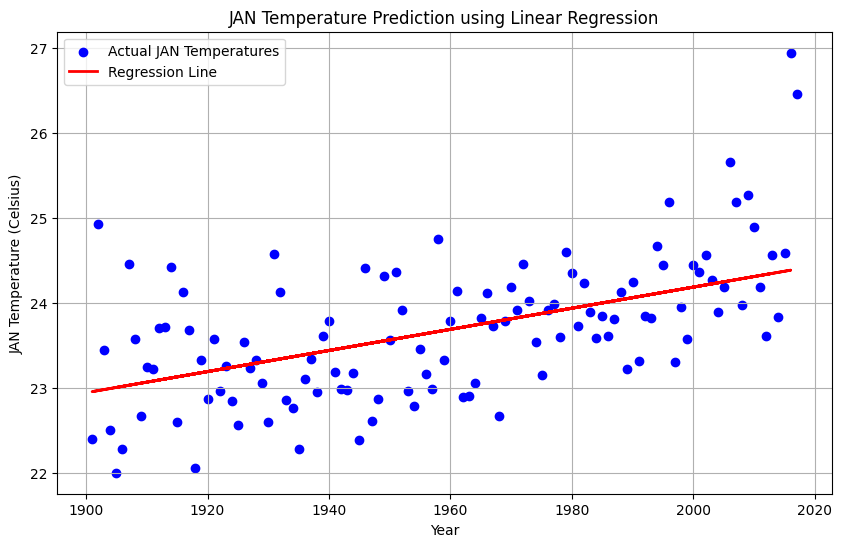


=== FEB ===
Performance Metrics:
Mean Squared Error: 0.71
Mean Absolute Error: 0.59
R-squared Score: 0.55


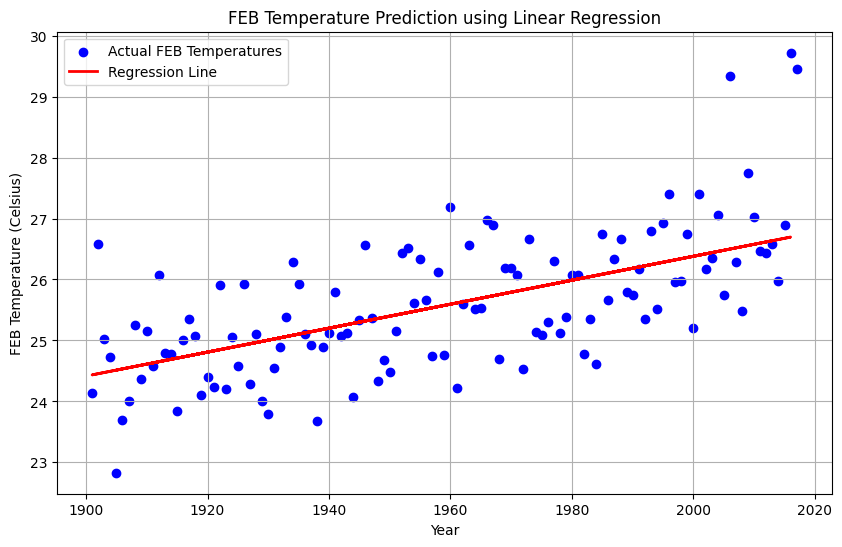


=== MAR ===
Performance Metrics:
Mean Squared Error: 0.98
Mean Absolute Error: 0.77
R-squared Score: 0.35


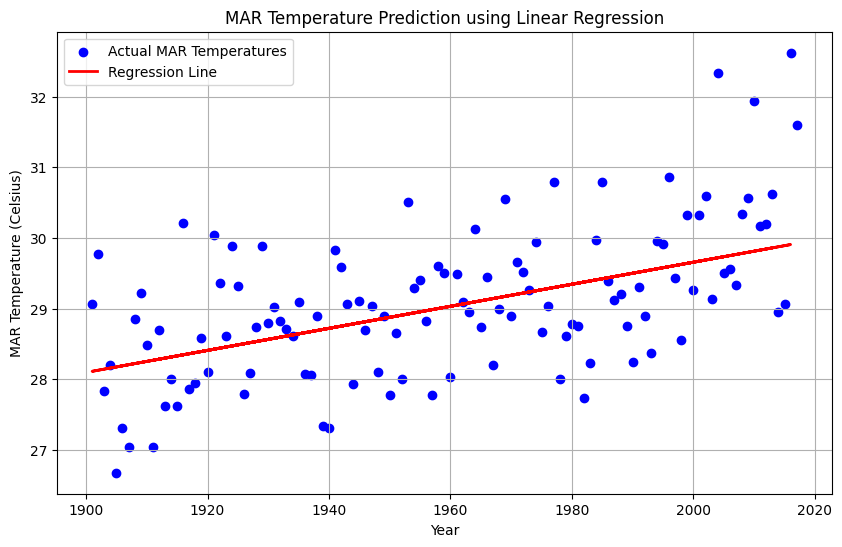


=== APR ===
Performance Metrics:
Mean Squared Error: 0.75
Mean Absolute Error: 0.68
R-squared Score: 0.27


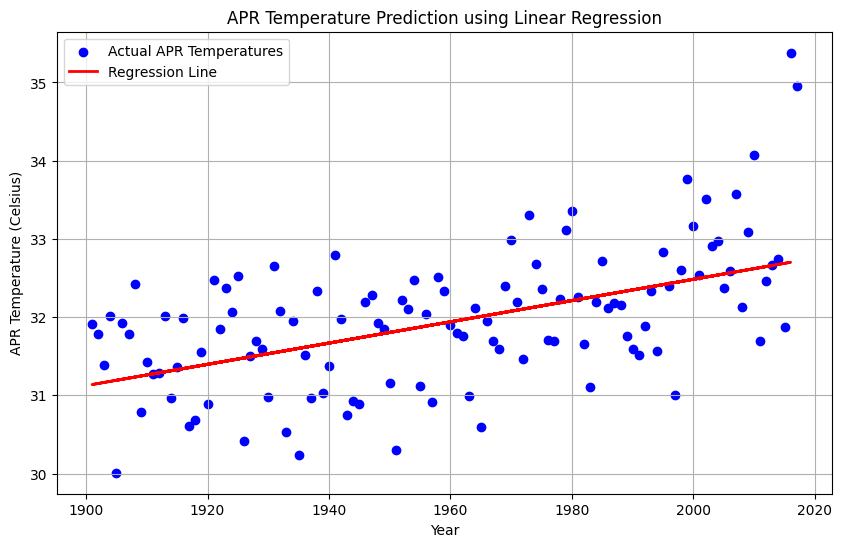


=== MAY ===
Performance Metrics:
Mean Squared Error: 0.44
Mean Absolute Error: 0.54
R-squared Score: 0.22


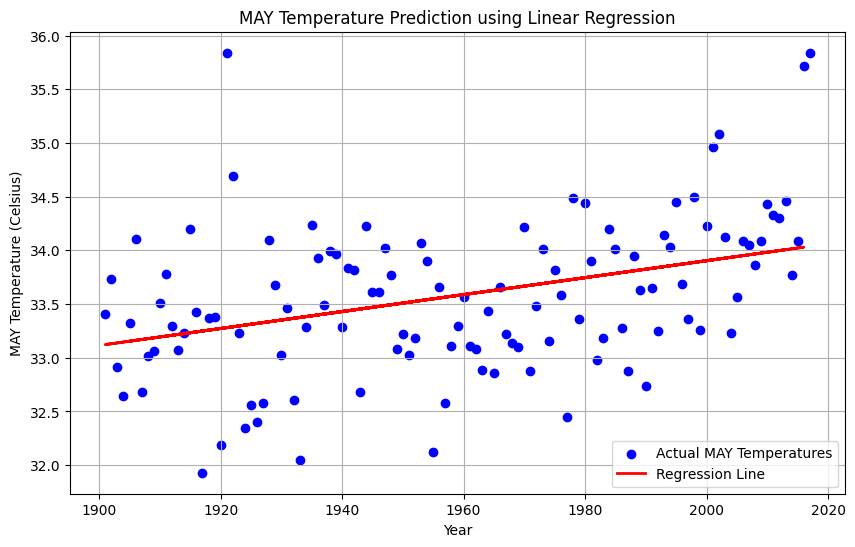


=== JUN ===
Performance Metrics:
Mean Squared Error: 0.39
Mean Absolute Error: 0.51
R-squared Score: 0.04


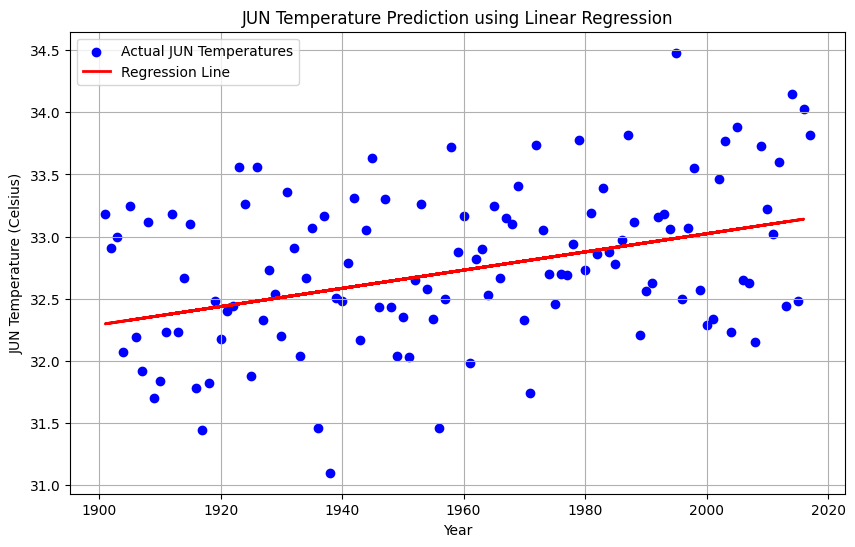


=== JUL ===
Performance Metrics:
Mean Squared Error: 0.19
Mean Absolute Error: 0.32
R-squared Score: 0.13


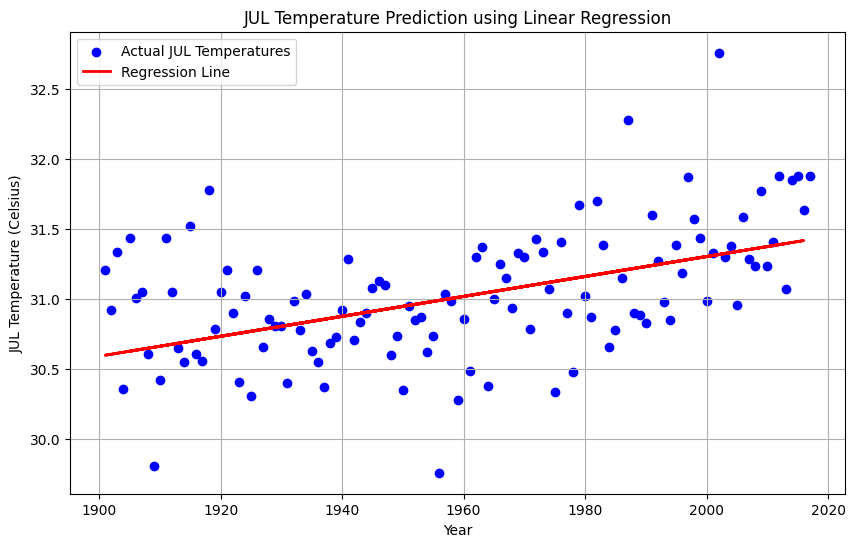


=== AUG ===
Performance Metrics:
Mean Squared Error: 0.15
Mean Absolute Error: 0.30
R-squared Score: 0.19


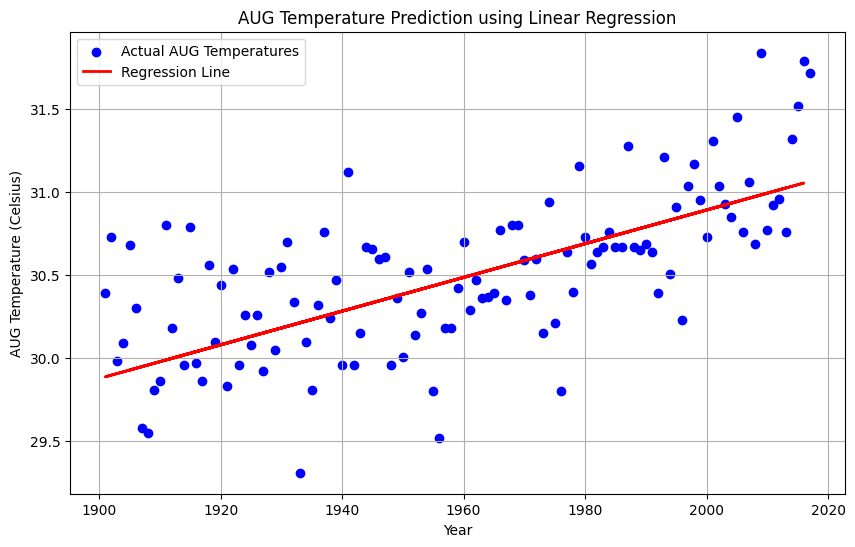


=== SEP ===
Performance Metrics:
Mean Squared Error: 0.09
Mean Absolute Error: 0.22
R-squared Score: 0.55


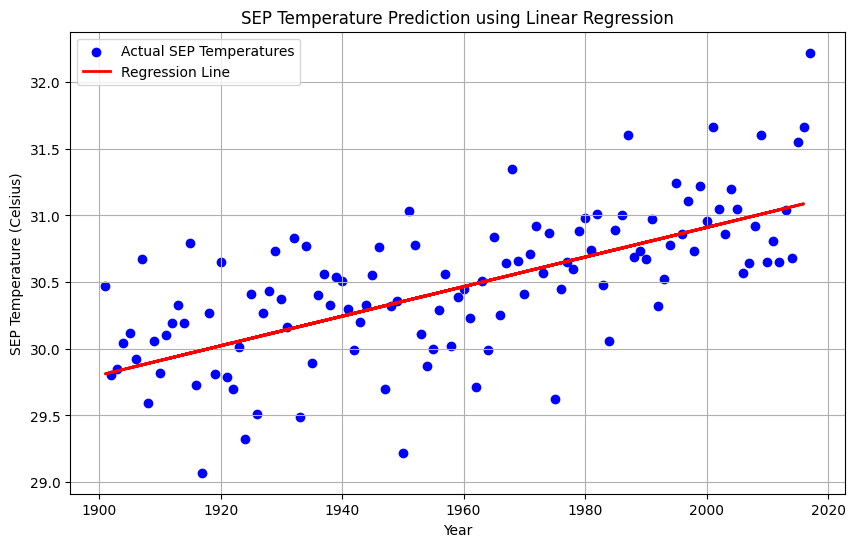


=== OCT ===
Performance Metrics:
Mean Squared Error: 0.45
Mean Absolute Error: 0.52
R-squared Score: 0.17


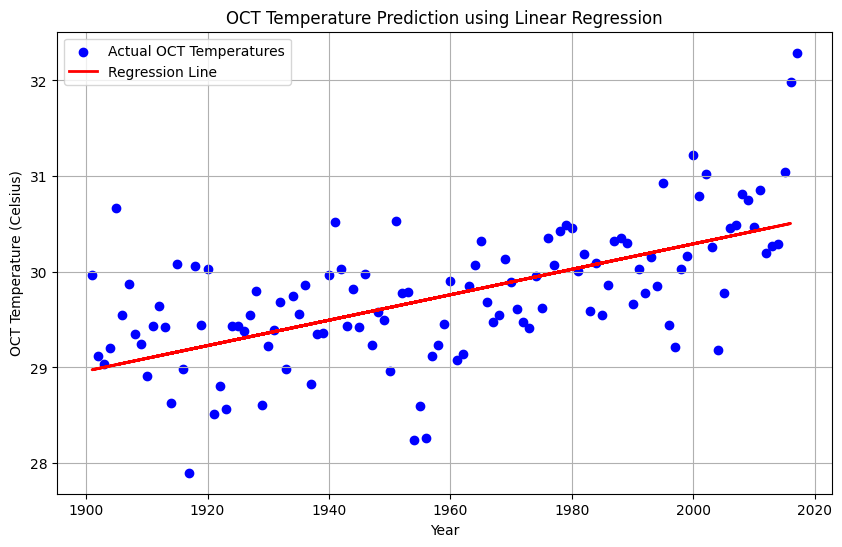


=== NOV ===
Performance Metrics:
Mean Squared Error: 0.38
Mean Absolute Error: 0.46
R-squared Score: 0.50


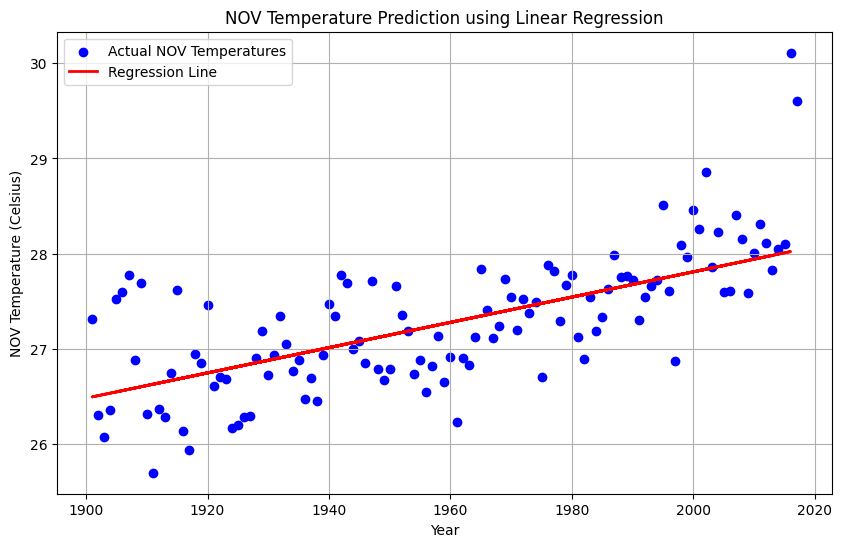


=== DEC ===
Performance Metrics:
Mean Squared Error: 0.41
Mean Absolute Error: 0.42
R-squared Score: 0.53


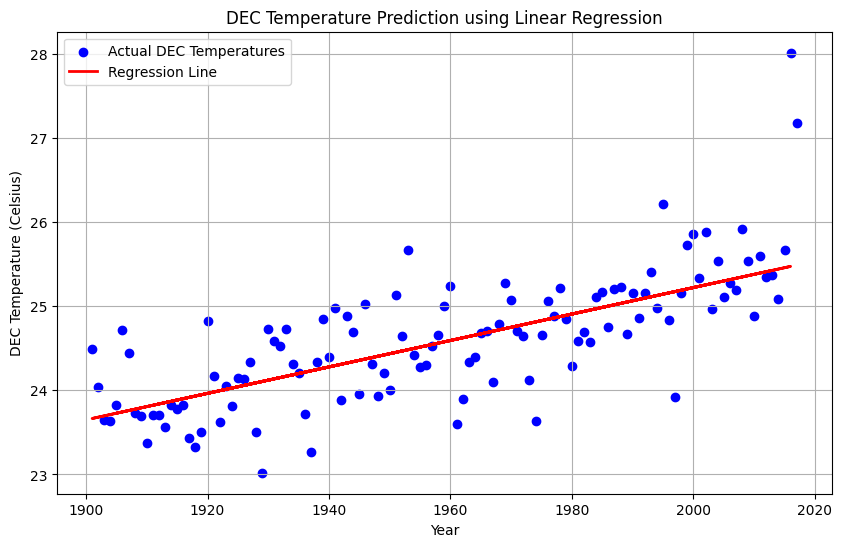

In [ ]:
# Loop through each month in the list of months for regression analysis
for month in months:
    print(f'\n=== {month} ===')  # Print the current month being processed
    
    # Prepare data for regression
    X = df['YEAR'].values.reshape(-1, 1)  # Features (Years) reshaped to a 2D array for the model
    y = df[month].values  # Target variable: Month-wise temperatures for the current month
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # 75% of the data will be used for training, and 25% for testing
    
    # Initialize and train the Linear Regression model
    model = LinearRegression()  # Create an instance of the LinearRegression model
    model.fit(X_train, y_train)  # Fit the model to the training data
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)  # Predict temperatures for the test set
    
    # Assess performance of the regression model
    mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
    mae = mean_absolute_error(y_test, y_pred)  # Calculate Mean Absolute Error
    r2 = r2_score(y_test, y_pred)  # Calculate R-squared score for model performance
    
    # Print the performance metrics for the current month
    print('Performance Metrics:')
    print(f'Mean Squared Error: {mse:.2f}')  # Output MSE
    print(f'Mean Absolute Error: {mae:.2f}')  # Output MAE
    print(f'R-squared Score: {r2:.2f}')  # Output R² score
    
    # Visualize the Simple Regression Model
    plt.figure(figsize=(10, 6))  # Set the figure size for the plot#width and height
    plt.scatter(X, y, color='blue', label=f'Actual {month} Temperatures')  # Scatter plot of actual temperatures
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')  # Line plot of predicted temperatures
    plt.title(f'{month} Temperature Prediction using Linear Regression')  # Title of the plot with the current month
    plt.xlabel('Year')  # Label for the x-axis
    plt.ylabel(f'{month} Temperature (Celsius)')  # Label for the y-axis, indicating temperature in Celsius
    plt.legend()  # Display the legend to identify actual vs predicted values
    plt.grid(True)  # Enable grid on the plot for better readability
    plt.show()  # Display the plot for the current month
